In [135]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

In [3]:
# Using Google Colab Upload Function
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [4]:
# Read the CSV file
df = pd.read_csv('Mall_Customers.csv')

In [5]:
# Display the first 5 rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Metadata of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
# Statistical description of the dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
# Display the shape of the dataset 
df.shape

(200, 5)

In [12]:
# Finding null values, we see that there aren't any
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [15]:
# As we want to determine the groups the clustering forms, we could drop the CustomerID since that will not contribute to the outcome
df.drop(['CustomerID'], axis=1, inplace=True)

In [25]:
#To transform the dataset to have only numerical values
X = df.to_numpy()
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:, 0])

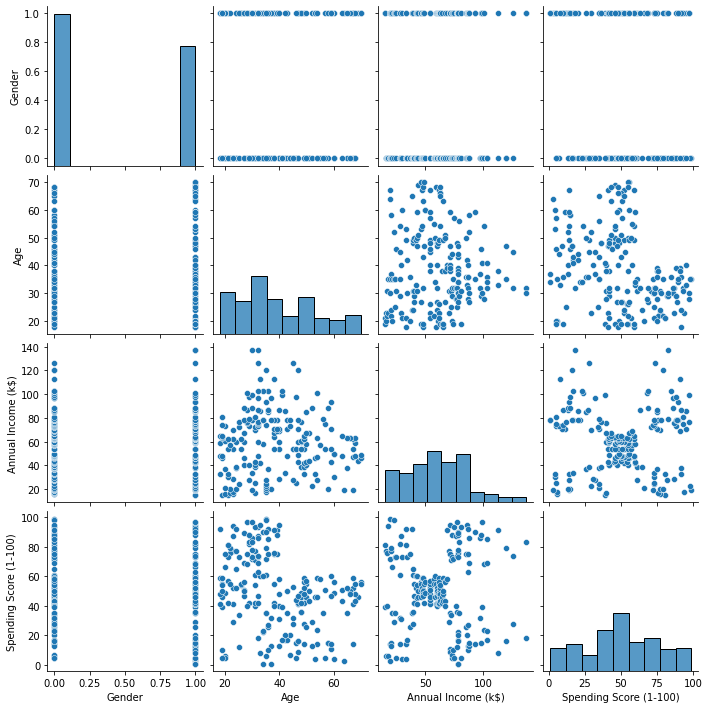

In [29]:
# Pairplot
sns.pairplot(pd.DataFrame(X, columns=df.columns))

In [153]:
# To determine the best value of k, we use the Elbow method. So we implement KMeans for K Values from 1 to 10 and plot Elbow Graph
inertias = []
distortions = []
prediction = pd.DataFrame()
for i in range(1, 11):
  kmeanModel = KMeans(n_clusters=i).fit(X)
  inertias.append(kmeanModel.inertia_)
  prediction[i]=kmeanModel.predict(X)
  distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])

[Text(0, 0.5, 'Distortion'), Text(0.5, 0, 'K Value')]

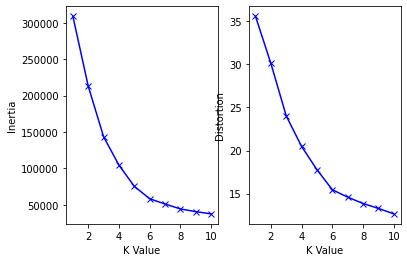

In [169]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(range(1,11), inertias, 'bx-')
ax1.set(xlabel='K Value', ylabel='Inertia')

ax2.plot(range(1,11), distortions, 'bx-')
ax2.set(xlabel='K Value', ylabel='Distortion')

With PCA

In [155]:
# Initialize PCA
pca = PCA(2)

In [68]:
pdf = pca.fit_transform(X)

In [69]:
pdf.shape

(200, 2)

In [156]:
inertias_ = []
centroids = []
distortions_ = []
prediction_ = pd.DataFrame()
for i in range(1, 11):
  kmeanModel_ = KMeans(n_clusters=i).fit(pdf)
  inertias_.append(kmeanModel_.inertia_)
  prediction_[i]=kmeanModel_.predict(pdf)
  centroids.append(kmeanModel_.cluster_centers_)
  distortions_.append(sum(np.min(cdist(pdf, kmeanModel_.cluster_centers_,'euclidean'), axis=1)) / pdf.shape[0])

[Text(0, 0.5, 'Distortion'), Text(0.5, 0, 'K Value')]

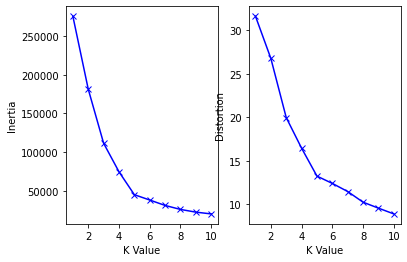

In [168]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(range(1,11), inertias_, 'bx-')
ax1.set(xlabel='K Value', ylabel='Inertia')

ax2.plot(range(1,11), distortions_, 'bx-')
ax2.set(xlabel='K Value', ylabel='Distortion')

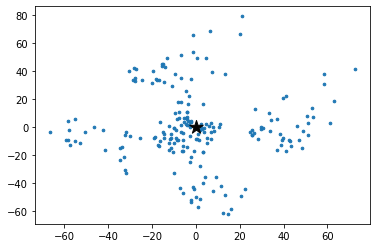

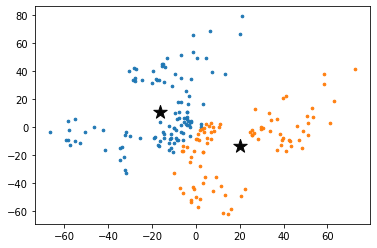

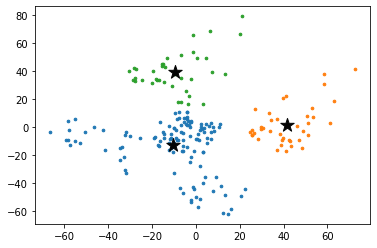

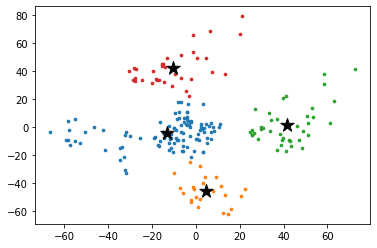

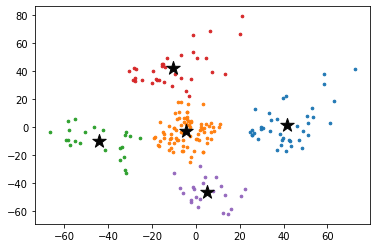

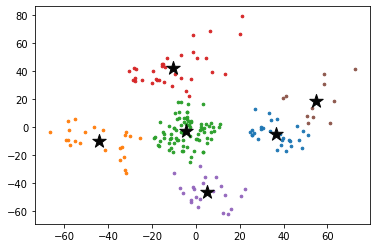

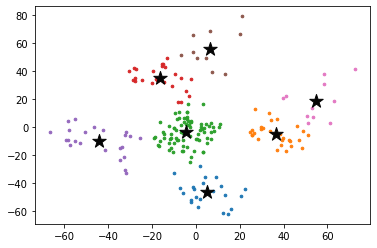

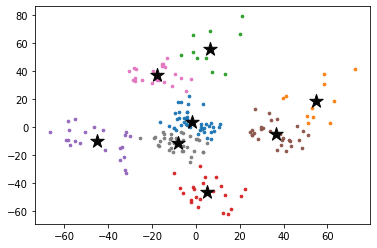

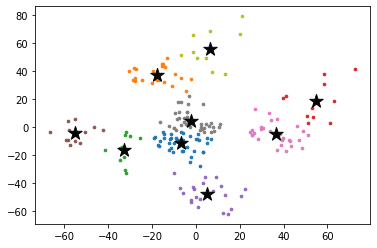

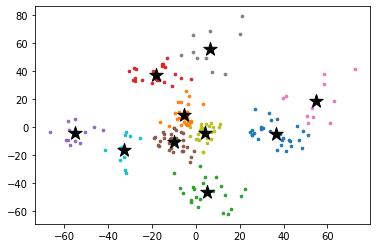

In [134]:
for i in range(1, 11):
  for j in range(i):
        points = np.array([pdf[l] for l in range(len(prediction_[i])) if prediction_[i][l] == j])
        plt.scatter(points[:, 0], points[:, 1], s=7)
  plt.scatter(centroids[i-1][:,0], centroids[i-1][:,1], marker='*', s=200, c='#050505')
  plt.show()